In [2]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import colors
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
import cv2


print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.21.5
TensorFlow Version :2.9.1
Matplotlib Version :3.5.3


In [3]:
IMAGE_PATH = '../input/bee_imgs/bee_imgs/'
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMG_SIZE = 64
RANDOM_STATE = 2018
TEST_SIZE = 0.2
VAL_SIZE = 0.2
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
PATIENCE = 5
VERBOSE = 1

Text(0.3, 0.3, '한글')

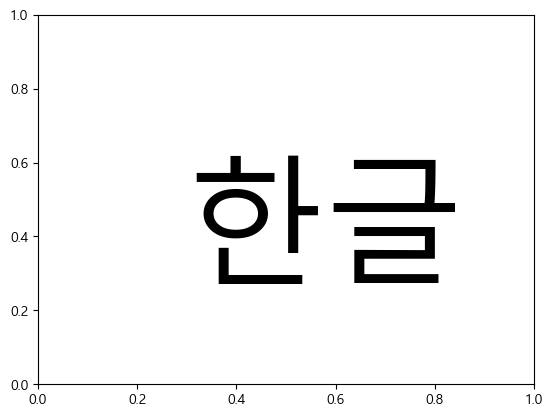

In [4]:
plt.rc("font", family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)
plt.text(0.3, 0.3, '한글', size=100)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [59]:
cls = os.listdir("../medicine")
cls

['TL_81_단일', 'TS_81_단일']

In [60]:
TL_81 = cls[0]
TS_81 = cls[1]

In [61]:
cls2 = os.listdir("../medicine" +'/' + TL_81)
cls3 = os.listdir("../medicine" +'/' + TS_81)
print(cls2)

['K-038884_json', 'K-038890_json', 'K-038896_json', 'K-038910_json', 'K-038912_json', 'K-038913_json', 'K-038914_json', 'K-038927_json', 'K-038929_json', 'K-038954_json', 'K-038958_json', 'K-038959_json', 'K-038962_json', 'K-038967_json', 'K-038970_json', 'K-039021_json', 'K-039036_json', 'K-039047_json', 'K-039104_json', 'K-039108_json', 'K-039123_json', 'K-039136_json', 'K-039146_json', 'K-039147_json']


In [68]:
ts_list = []
tl_list = []

for file in cls2:
        tl_list.append(os.listdir("../medicine/TL_81_단일" +'/' + file))
for file in cls3:
        ts_list.append(os.listdir("../medicine/TS_81_단일" +'/' + file))
ts_list = np.concatenate(ts_list).tolist()
tl_list = np.concatenate(tl_list).tolist()

In [70]:
df = pd.DataFrame({
    'PNG' : ts_list,
    'JSON' : tl_list
})
df

,PNG,JSON
0,K-038884_0_0_0_0_75_000_200.png,K-038884_0_0_0_0_75_000_200.json
1,K-038884_0_0_0_0_75_020_200.png,K-038884_0_0_0_0_75_020_200.json
2,K-038884_0_0_0_0_75_040_200.png,K-038884_0_0_0_0_75_040_200.json
3,K-038884_0_0_0_0_75_060_200.png,K-038884_0_0_0_0_75_060_200.json
4,K-038884_0_0_0_0_75_080_200.png,K-038884_0_0_0_0_75_080_200.json
...,...,...
9607,K-039147_0_2_1_2_90_260_200.png,K-039147_0_2_1_2_90_260_200.json
9608,K-039147_0_2_1_2_90_280_200.png,K-039147_0_2_1_2_90_280_200.json
9609,K-039147_0_2_1_2_90_300_200.png,K-039147_0_2_1_2_90_300_200.json
9610,K-039147_0_2_1_2_90_320_200.png,K-039147_0_2_1_2_90_320_200.json


In [71]:
import json
import os
from tqdm import tqdm

In [86]:
with open("../medicine/TL_81_단일/K-038884_json/K-038884_0_0_0_0_75_000_200.json", "r", encoding="utf8") as f:
    contents = f.read()
    json_data = json.loads(contents)
json_data

{'images': [{'file_name': 'K-038884_0_0_0_0_75_000_200.png',
   'width': 976,
   'height': 1280,
   'imgfile': 'K-038884_0_0_0_0_75_000_200.png',
   'drug_N': 'K-038884',
   'drug_S': '정상알약',
   'back_color': '검은색 배경',
   'drug_dir': '앞면',
   'light_color': '전구색',
   'camera_la': 75,
   'camera_lo': 0,
   'size': 200,
   'item_seq': '201602513',
   'leng_long': '6.2',
   'leng_short': '6.2',
   'thick': '3.05',
   'id': 1,
   'dl_idx': '38883',
   'dl_mapping_code': 'K-038884',
   'dl_name': '에피나레정',
   'dl_name_en': 'Epinare Tab.',
   'img_key': 'http://connectdi.com/design/img/drug/1NOwp2F69E9.jpg',
   'dl_material': '에피나스틴염산염',
   'dl_material_en': 'Epinastine Hydrochloride',
   'dl_custom_shape': '정제, 저작정',
   'dl_company': '제이더블유신약(주)',
   'dl_company_en': 'Jw Shinyak',
   'di_company_mf': '삼천당제약(주)',
   'di_company_mf_en': 'Scd Pharm',
   'di_item_permit_date': '20160504',
   'di_class_no': '[01490]기타의 알레르기용약',
   'di_etc_otc_code': '전문의약품',
   'di_edi_code': '644102890',
   'cha

In [66]:
path = "../medicine/TL_81_단일/"

In [88]:
dl_name = []
PNG_name = []
for file in cls2:
    file_list = []
    file_list.append(os.listdir("../medicine/TL_81_단일" +'/' + file))
    file_list = np.concatenate(file_list).tolist()
    for j_file in file_list:
        with open(path + file + '/' + j_file, "r", encoding="utf8") as f:
            contents = f.read()
            json_data = json.loads(contents)
            dl_name.append(json_data['images'][0]['dl_name'])
            PNG_name.append(json_data['images'][0]['imgfile'])

In [90]:
df2 = pd.DataFrame({
    'PNG' : PNG_name,
    'Medicine_Name' : dl_name
})
df2

,PNG,Medicine_Name
0,K-038884_0_0_0_0_75_000_200.png,에피나레정
1,K-038884_0_0_0_0_75_020_200.png,에피나레정
2,K-038884_0_0_0_0_75_040_200.png,에피나레정
3,K-038884_0_0_0_0_75_060_200.png,에피나레정
4,K-038884_0_0_0_0_75_080_200.png,에피나레정
...,...,...
9607,K-039147_0_2_1_2_90_260_200.png,듀카브정30/10밀리그램
9608,K-039147_0_2_1_2_90_280_200.png,듀카브정30/10밀리그램
9609,K-039147_0_2_1_2_90_300_200.png,듀카브정30/10밀리그램
9610,K-039147_0_2_1_2_90_320_200.png,듀카브정30/10밀리그램
